# Lab 7b.



## Newton basins of attraction
    
In class today we created the function

    def plotNewt(f, x, x0):
    
that takes as input a function $f(x)$ and an initial value $x_0$.  It then creates a plot illustrating Newton's method. 

We noticed for functions like $x^2-2$, $\cos(x)$ and $\sin(x)$ that the root Newton's method finds depends to a large extent on the initial guess $x_0$.  The trend we saw from class was that:

   a) If $x_0$ is close-enough to a root, Newton's method converges very fast to it.

   b) If $x_0$ is relatively far from roots, Newton's method may wander a large amount before settling down to a root.  It can also occasionally fail to find a root.  Mostly this seemed to occur when $x_i$ eventually was outside of the domain of the Newton iterator, and in all the instances we examined this was when $f'(x_i)$ was not defined. 

## Part (A)

For this lab we ask you to make a plot of pairs $(x_0, R(x_0))$ where $x_0$ is an initial value, and $R(x_0)$ is the root Newton's method converges to when given $x_0$ as its initial value. 

As you make progress on this project, you will need to make some decisions.  For example, if Newton's method fails, it perhaps makes the most sense not to plot a point $(x_0, R(x_0))$.  Similarly, you might find the values $R(x_0)$ are too large, so you might need to adjust your scale, or to make some other "off scale" convention, to ensure your plots are readable.

Do your plot for the three functions:

$$ (1) \ \ f(x) = x(x-1)(x+1)$$

$$ (2) \ \ f(x) = \sin(x)$$

$$ (3) \ \ f(x) = \cos(x)$$

It perhaps makes sense to just make one routine that takes as input $f(x)$ as well as the $x$-axis interval you would like to perform your plot on.   For (1) make your interval $[-2,2]$.  For (2) make your interval $[-3\pi, 3\pi]$ and for (3) make your interval $[-\pi, \pi]$. 


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy import pi as pi

def Newt(f, x, x0):
    li=[]
    err=1*10**(-10)
    F = sp.lambdify(x, f)
    N = x - f/f.diff(x)
    IT = sp.lambdify(x, N)
    li.append(IT(x0))
    dif=1
    x1=IT(x0)
    while dif>err:
        x1=IT(x1)
        li.append(x1)
        dif=abs(li[-1]-li[-2])
    return li[-1]

In [7]:
x=sp.Symbol('x')
f1=x*(x-1)*(x+1)
f2=sp.sin(x)
f3=sp.cos(x)
n=100

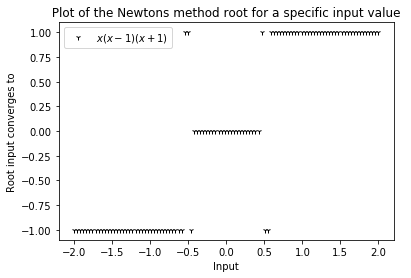

In [8]:
X1=[]
Y1=[]
for x0 in np.linspace(-2,2,n):
    X1.append(x0)
    Y1.append(Newt(f1,x,x0))  
plt.plot(X1,Y1,"k1",label="$x(x-1)(x+1)$")
plt.legend()
plt.xlabel("Input")
plt.ylabel("Root input converges to")
plt.title(" Plot of the Newtons method root for a specific input value ")
plt.show()

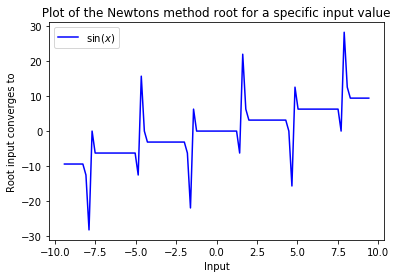

In [99]:
X2=[]
Y2=[]
for x0 in np.linspace(-3*pi,3*pi,n):
    X2.append(x0)
    Y2.append(Newt(f2,x,x0))
plt.plot(X2,Y2,"b",label="$\sin(x)$")
plt.legend()
plt.title(" Plot of the Newtons method root for a specific input value ")
plt.xlabel("Input")
plt.ylabel("Root input converges to")
plt.show()

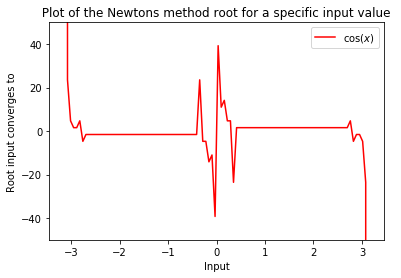

In [100]:
X3=[]
Y3=[]
for x0 in np.linspace(-pi,pi,n):
    X3.append(x0)
    Y3.append(Newt(f3,x,x0))
plt.plot(X3,Y3,"r",label="$\cos(x)$")
plt.ylim(-50,50)
plt.legend()
plt.title(" Plot of the Newtons method root for a specific input value ")
plt.xlabel("Input")
plt.ylabel("Root input converges to")
plt.show()

## Part (B)

Newton's method works in a wide variety of contexts other than functions of a single real variable.  People also apply it to functions of complex variables to solve complex equations such as $z^8 - z^2 + z - 2 =0$, and for functions of matrix variables to solve equations such as $A^4 - 3A^2 + 2A + I = 0$, where, say, $A$ is an $n \times n$ matrix. 

Consider applying Newton's method to find the roots of $z^3 - 1$ in the complex plane.  This polynomial factors as
$$z^3 - 1 = (z-1)(z^2 + z + 1) = (z-1)(z-e^\frac{2\pi i}{3})(z-e^{-\frac{2\pi i}{3}})$$
so there are three roots (in the complex plane), and they are:
$$ 1, \ \ e^\frac{2\pi i}{3} = \cos \frac{2 \pi}{3} + i \sin\frac{2\pi}{3}, \ \ e^\frac{-2\pi i}{3} = \cos \frac{2 \pi}{3} - i \sin \frac{2 \pi}{3} $$

We know the roots of this polynomial exactly.  The purpose of this exercise is to plot how the root Newton's method finds depends on the initial guess.

We accomplish the task with a [matplotlib.pyplot.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) plot.

This means will decide how pixels in the image correspond to points in the complex plane. For this plot, let the real and imaginary parts of our complex variable $z$ range through the interval $[-2,2]$, i.e. $z = x+iy$ with $-2 \leq x,y \leq 2$. 

Let's colour the point in the image red, green or blue depending on which of the three roots Newton's method finds. 

Your task for Part (B) is to create create a pyplot *imshow()* plot, which colours a pixel red, green or blue depending on which root Newton's method finds.  The pixel corresponds to a complex initial guess $z_0 = x_0 + i y_0$ with $-2 \leq x_0, y_0 \leq 2$.  

Your final image should look something like this:

<img src="Newt.png">

**Hint**: Depending on how you write your code, it can potentially be quite slow.  Start off using low numbers of iterations, and creating low resolution images.  As your code becomes more efficient, try increasing the iterations and resolution.

In [37]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy import pi as pi
import itertools
def Newt(f, x, x0):
    li=[]
    err=1*10**(-10)
    F = sp.lambdify(x, f)
    N = x - f/f.diff(x)
    IT = sp.lambdify(x, N)
    li.append(IT(x0))
    dif=1
    x1=IT(x0)
    while dif>err:
        x1=IT(x1)
        li.append(x1)
        dif=abs(li[-1]-li[-2])
    return [li[-1].real,li[-1].imag]

In [181]:
A=np.array([])
n=200
r1=1;
r2=np.around(np.cos(2*pi/3)+j*np.sin(2*pi/3),5);
r3=np.around(np.cos(2*pi/3)-j*np.sin(2*pi/3),5)
z=sp.Symbol("z")
f=z**3-1
j=1j
q=list(enumerate(np.linspace(-2,2,n)))
qdat=[]
for x in q:
    for y in q:
        qdat.append(((x[0],y[0]),(x[1],y[1])))
A = np.zeros([])
# print(A)

In [182]:
for a in qdat:
    x0 = a[1][0];  y0 = a[1][1]; # Data values
    xpos = a[0][0]; ypos = a[0][1] # Position Values
    z0=x0+y0*j #creating compex object
    z1=Newt(f,z,z0) # pushing complex value through newtons method to find converging root
    z11=z1[0]+z1[1]*j
    z11=np.around(z11,5) # rounding so comparison works

    if z11 == r1: # 1
        A=np.insert(A,xpos*n+ypos,1)
    elif z11 == r2: # ((e^2)*pi*j) / 2
        A=np.insert(A,xpos*n+ypos,2)
    elif z11 == r3: # -((e^2)*pi*j) / 2
        A=np.insert(A,xpos*n+ypos,3)
    else:
        pass

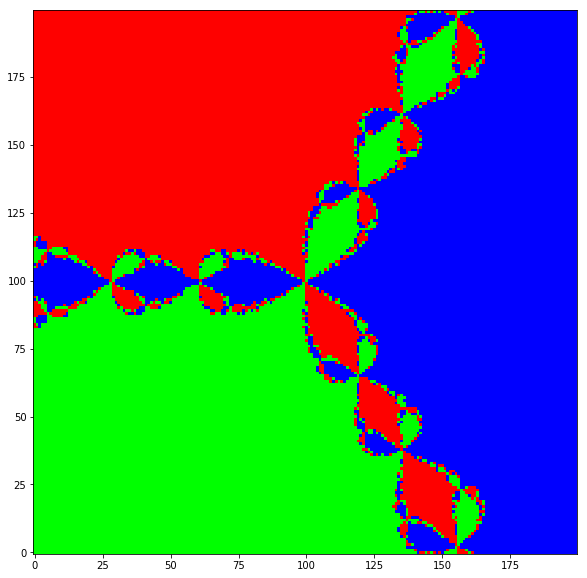

In [185]:
A=np.resize(A,(n,n))
# print(A.T)
# print(A.size)
plt.figure(figsize=(10,10))
plt.imshow(A.T,cmap="brg",origin='lower')
plt.show()